# Multivariate Linear Regression

Simple Linear Regression Multiple Variable

$$\hat{y} = m_0 x_0 + m_1 x_1 + m_2 x_2 + ... + c$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
data = {
    'Mesin x1': [112,250,360,450,600],
    'Usia x2': [5,3,3,1,1],
    'KM x3': [8,7,7,5,4],
    'Harga y': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)
df

,Mesin x1,Usia x2,KM x3,Harga y
0,112,5,8,100
1,250,3,7,200
2,360,3,7,300
3,450,1,5,400
4,600,1,4,500


In [6]:
df.corr()

,Mesin x1,Usia x2,KM x3,Harga y
Mesin x1,1.000000,-0.934973,-0.954740,0.996942
Usia x2,-0.934973,1.000000,0.945611,-0.944911
KM x3,-0.954740,0.945611,1.000000,-0.962250
Harga y,0.996942,-0.944911,-0.962250,1.000000


In [9]:
model = LinearRegression()
model.fit(df[['Mesin x1', 'Usia x2', 'KM x3']], df['Harga y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
m = model.coef_
c = model.intercept_

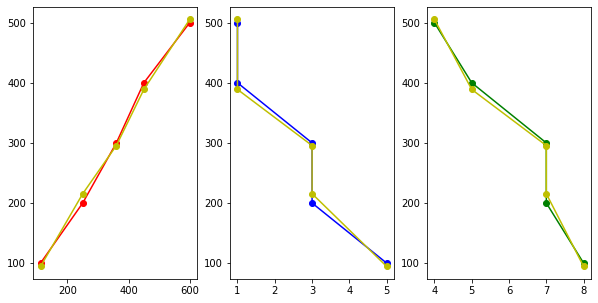

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(df['Mesin x1'], df['Harga y'], 'ro-')
plt.plot(df['Mesin x1'], df['y_pred'], 'yo-')
plt.subplot(132)
plt.plot(df['Usia x2'], df['Harga y'], 'bo-')
plt.plot(df['Usia x2'], df['y_pred'], 'yo-')
plt.subplot(133)
plt.plot(df['KM x3'], df['Harga y'], 'go-')
plt.plot(df['KM x3'], df['y_pred'], 'yo-')

In [15]:
#predict
#mesin, usia, km
model.predict([[112, 5, 8]])[0]

94.47513812154695

In [16]:
df['y_pred'] = model.predict(df[['Mesin x1', 'Usia x2', 'KM x3']])
df

,Mesin x1,Usia x2,KM x3,Harga y,y_pred
0,112,5,8,100,94.475138
1,250,3,7,200,215.469613
2,360,3,7,300,295.580110
3,450,1,5,400,388.950276
4,600,1,4,500,505.524862


In [26]:
df['y&x1'] = m[0] * df['Mesin x1'] + c
df['y&x2'] = m[1] * df['Usia x2'] + c
df['y&x3'] = m[2] * df['KM x3'] + c
df

,Mesin x1,Usia x2,KM x3,Harga y,y_pred,y&x1,y&x2,y&x3
0,112,5,8,100,94.475138,186.037167,71.572074,45.806128
1,250,3,7,200,215.469613,286.539427,84.731291,53.139126
2,360,3,7,300,295.580110,366.649925,84.731291,53.139126
3,450,1,5,400,388.950276,432.194877,97.890507,67.805123
4,600,1,4,500,505.524862,541.436464,97.890507,75.138122


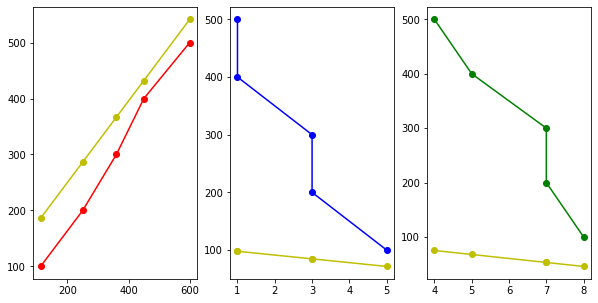

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(df['Mesin x1'], df['Harga y'], 'ro-')
plt.plot(df['Mesin x1'], df['y&x1'], 'yo-')
plt.subplot(132)
plt.plot(df['Usia x2'], df['Harga y'], 'bo-')
plt.plot(df['Usia x2'], df['y&x2'], 'yo-')
plt.subplot(133)
plt.plot(df['KM x3'], df['Harga y'], 'go-')
plt.plot(df['KM x3'], df['y&x3'], 'yo-')

In [38]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error
from sklearn.metrics import r2_score

In [39]:
print("MAE:", mean_absolute_error(df['Harga y'], df['y_pred']))

MAE: 8.397790055248615


In [40]:
print('Max Error:', max_error(df['Harga y'], df['y_pred']))

Max Error: 15.469613259668506


In [41]:
print('RMSE: ', np.sqrt(mean_squared_error(df['Harga y'], df['y_pred'])))

RMSE:  9.40200989444536


In [43]:
print("MSLE:", mean_squared_log_error(df['Harga y'], df['y_pred']))

MSLE: 0.0019563967494522416


In [44]:
print("RMSLE:", np.sqrt(mean_squared_log_error(df['Harga y'], df['y_pred'])))

RMSLE: 0.04423117395516698


In [45]:
print('MedAE:', median_absolute_error(df['Harga y'], df['y_pred']))

MedAE: 5.524861878453066


In [46]:
print('R2:', r2_score(df['Harga y'], df['y_pred']))

R2: 0.9955801104972376
